In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

In [2]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
Rainier_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="Rainier"]
Rainier_Cpx['Sample_ID_Cpx']="Rainier"

C:\Users\penny\AppData\Local\Temp\ipykernel_15544\1956168632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rainier_Cpx['Sample_ID_Cpx']="Rainier"


In [3]:
Rainier_Spessartite=Rainier_Cpx.loc[Rainier_Cpx['Formation']=="Spessartite"]
Rainier_sunset=Rainier_Cpx.loc[Rainier_Cpx['Formation']=="sunset mafics"]
Rainier_Burr=Rainier_Cpx.loc[Rainier_Cpx['Formation'].str.contains('BUR')]

(array([3., 1., 1., 2., 1., 2., 0., 0., 0., 1.]),
 array([-1.52220964, -0.25165692,  1.0188958 ,  2.28944852,  3.56000125,
         4.83055397,  6.10110669,  7.37165941,  8.64221213,  9.91276485,
        11.18331757]),
 <BarContainer object of 10 artists>)

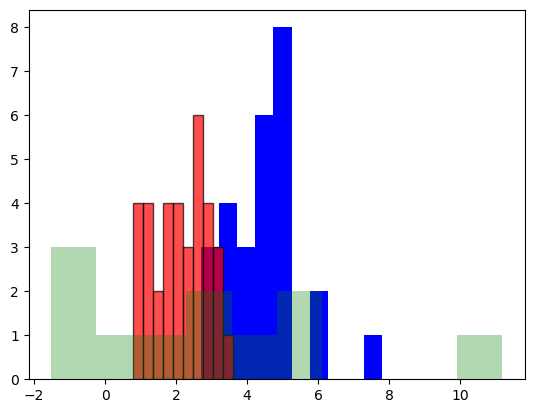

In [4]:
plt.hist(Rainier_Spessartite['P_Wang21_eq1'], color='blue')
plt.hist(Rainier_sunset['P_Wang21_eq1'], alpha=0.7, color='red', ec='k')
plt.hist(Rainier_Burr['P_Wang21_eq1'], alpha=0.3, color='green')

In [5]:
print(np.nanmedian(Rainier_Spessartite['P_Wang21_eq1']))
print(np.nanmedian(Rainier_sunset['P_Wang21_eq1']))

4.390309367902493
2.184362334700875


In [6]:
print(np.nanmedian(Rainier_Spessartite['P_Jorgenson22']))
print(np.nanmedian(Rainier_sunset['P_Jorgenson22']))

2.860940298507462
1.3575348258706468


(array([3., 4., 2., 2., 0., 1., 0., 0., 0., 1.]),
 array([ 1.11934328,  2.03974328,  2.96014328,  3.88054328,  4.80094328,
         5.72134328,  6.64174328,  7.56214328,  8.48254328,  9.40294328,
        10.32334328]),
 <BarContainer object of 10 artists>)

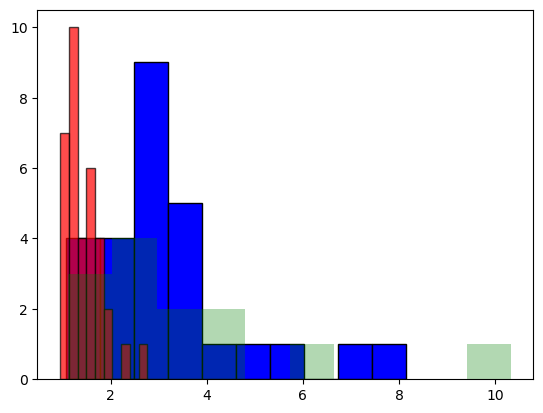

In [7]:
plt.hist(Rainier_Spessartite['P_Jorgenson22'], color='blue', ec='k')
plt.hist(Rainier_sunset['P_Jorgenson22'], alpha=0.7, color='red', ec='k')
plt.hist(Rainier_Burr['P_Jorgenson22'], alpha=0.3, color='green')

In [8]:
Rainier_Cpx['Formation'].unique()

array(['BURROUGHS MOUNTAIN',
       'Andesite - BURROUGHS MOUNTAIN, E OF MOUNT RAINIER',
       'Andesite- BURROUGHS MOUNTAIN, E OF MOUNT RAINIER',
       'Andesite -SUMMER LAND, E OF MOUNT RAINIER',
       'Andesite- SUMMER LAND, E OF MOUNT RAINIER',
       'Dacite - SUMMER LAND, E OF MOUNT RAINIER', 'sunset mafics',
       'Spessartite'], dtype=object)

In [9]:
print(len(Rainier_Cpx))
WangCopy=Rainier_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=Rainier_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)

79


## Choose Crustal density

In [10]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


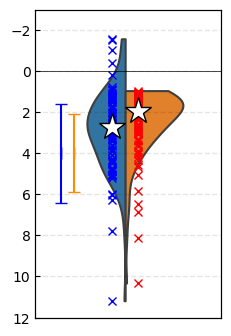

In [36]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2.4,4), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Rainier', 'Rainier', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Rainier', 'Rainier', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=["Rainier"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Rainier")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Rainier")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Rainier")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Rainier")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Rainier")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Rainier")]),  
         '*k', mfc='w', ms=20)


ind_offset=0.5
ms=3
# ax1.plot(-ind_offset-0.1+0*Rainier_Spessartite['P_Wang21_eq1'], 
#          Rainier_Spessartite['P_Wang21_eq1'], 'xb', color='blue', ms=ms)
# ax1.plot(-ind_offset+0*Rainier_sunset['P_Wang21_eq1'], Rainier_sunset['P_Wang21_eq1'], '.k', color='b',ms=ms)
# ax1.plot(-ind_offset+0.1+0*Rainier_Burr['P_Wang21_eq1'],
#          Rainier_Burr['P_Wang21_eq1'], '<k', color='b', ms=ms)

ind_offset=-0.6
# ax1.plot(-ind_offset-0.1+0*Rainier_Spessartite['P_Jorgenson22'], 
#          Rainier_Spessartite['P_Jorgenson22'], 'xr', color='r', ms=ms)
# ax1.plot(-ind_offset+0*Rainier_sunset['P_Jorgenson22'], Rainier_sunset['P_Jorgenson22'], '.k', color='r', ms=ms)
# ax1.plot(-ind_offset+0.1+0*Rainier_Burr['P_Jorgenson22'],
#          Rainier_Burr['P_Jorgenson22'], '<k', color='r', ms=ms)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.7, 0.75])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.set_xticks([])
ax1.errorbar(-0.5, 4, xerr=0, yerr=2.4,  ecolor='blue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(-0.4, 4, xerr=0, yerr=1.9,  ecolor='darkorange', elinewidth=1.5, fmt='none', capsize=4, mec='k')

fig.savefig('Rainier_Cpx.png', dpi=200)

C:\Users\penny\AppData\Local\Temp\ipykernel_15544\3815204497.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "xb" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(-ind_offset-0.1+0*Rainier_Spessartite['P_Wang21_eq1'],
C:\Users\penny\AppData\Local\Temp\ipykernel_15544\3815204497.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(-ind_offset+0*Rainier_sunset['P_Wang21_eq1'], Rainier_sunset['P_Wang21_eq1'], '.k', color='b', ms=ms, label='W2021 Sunset')
C:\Users\penny\AppData\Local\Temp\ipykernel_15544\3815204497.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "<k" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(-ind_offset+0.1+0*Rainier_Burr['P_Wang21_eq1'],
C:\Users\penny\AppData\Local\Temp\ipykernel_15544\3815204497.py:12: 

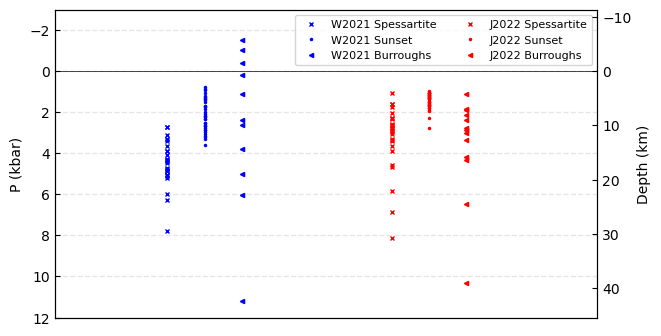

In [12]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(7,4), sharey=True)
ax2 = ax1.twinx()
ind_offset=0.3
ax1.plot(-ind_offset-0.1+0*Rainier_Spessartite['P_Wang21_eq1'], 
         Rainier_Spessartite['P_Wang21_eq1'], 'xb', color='blue', ms=ms, label='W2021 Spessartite')
ax1.plot(-ind_offset+0*Rainier_sunset['P_Wang21_eq1'], Rainier_sunset['P_Wang21_eq1'], '.k', color='b', ms=ms, label='W2021 Sunset')
ax1.plot(-ind_offset+0.1+0*Rainier_Burr['P_Wang21_eq1'],
         Rainier_Burr['P_Wang21_eq1'], '<k', color='b', ms=ms,  label='W2021 Burroughs')

ind_offset=-0.3
ax1.plot(-ind_offset-0.1+0*Rainier_Spessartite['P_Jorgenson22'], 
         Rainier_Spessartite['P_Jorgenson22'], 'xr', color='r', ms=ms, label='J2022 Spessartite')
ax1.plot(-ind_offset+0*Rainier_sunset['P_Jorgenson22'], Rainier_sunset['P_Jorgenson22'], '.k', color='r', ms=ms, label='J2022 Sunset')
ax1.plot(-ind_offset+0.1+0*Rainier_Burr['P_Jorgenson22'],
         Rainier_Burr['P_Jorgenson22'], '<k', color='r', ms=ms, label='J2022 Burroughs')


ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.7, 0.75])

# ax1.set_xlabel(None)
# ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
#ax2.set_yticks([])
ax1.set_xticks([])
ax1.legend(loc='upper right', ncol=2, fontsize=8)
ax1.set_ylabel('P (kbar)')
ax2.set_ylabel('Depth (km)')
fig.savefig('Rainier_Cpx_supp.png', dpi=200)


In [13]:
print( np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Rainier")]))

1.9505024875621888


In [14]:
print( np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Rainier")]))

2.728885539483855


## Amphibole

C:\Users\penny\AppData\Local\Temp\ipykernel_15544\4122422772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rainier_Amp['Sample_ID_Amp']="Rainier"
C:\Users\penny\AppData\Local\Temp\ipykernel_15544\4122422772.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rainier_Amp_Filt['Sample_ID_Amp']="Rainier"
C:\Users\penny\AppData\Local\Temp\ipykernel_15544\4122422772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

16
16


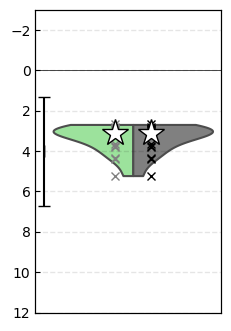

In [38]:

with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)
Rainier_Amp=All_Amp.loc[All_Amp['Volcano']=="Rainier"]
Rainier_Amp['Sample_ID_Amp']="Rainier"

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)
Rainier_Amp_Filt=All_Amp_Filt.loc[All_Amp_Filt['Volcano']=="Rainier"]
Rainier_Amp_Filt['Sample_ID_Amp']="Rainier"
Rainier_Amp['Class']='Unfilt'
Rainier_Amp_Filt['Class']='filt'

Combo_Amp=pd.concat([Rainier_Amp_Filt, Rainier_Amp], axis=0)

print(sum(Rainier_Amp['P_kbar_calc']>-10))
print(sum(Rainier_Amp_Filt['P_kbar_calc']>-10))

import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2.4,3.93), sharey=True)
ax2 = ax1.twinx()


# ax = sns.violinplot(y=Rainier_Amp['P_Ridolfi21'],
#                 inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)
sns.violinplot(x="Volcano", y="P_Ridolfi21",  cut=0,  inner=None, hue="Class",
            data=Combo_Amp, split=True, ax=ax1, width=0.9,  palette=['lightgreen', 'grey'],
               stick=True)


ax1.plot(-0.1+0*Rainier_Amp_Filt['P_Ridolfi21'],
  Rainier_Amp_Filt['P_Ridolfi21'],
         'x', mec='grey')
ax1.plot(+0.1+0*Rainier_Amp['P_Ridolfi21'],
  Rainier_Amp['P_Ridolfi21'],
         'x', mec='black')

ax1.plot(-0.1,
  np.nanmedian(Rainier_Amp_Filt['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot(+0.1,
  np.nanmedian(Rainier_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
ax1.get_legend().remove()
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.55, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)

ax1.errorbar(-0.5, 4, xerr=0, yerr=2.7,  ecolor='black', elinewidth=1.5, ms=0, capsize=4, mec='k')

fig.savefig('Rainier_Amp.png', dpi=200)

In [16]:
np.nanmedian(Rainier_Amp['P_Ridolfi21'])

3.1030731268054694

In [17]:
pd.set_option('display.max_columns', 100)

In [18]:
Rainier_Sunset=Rainier_Amp.iloc[9:22, :]
Rainier_Spess=Rainier_Amp.iloc[22:, :]


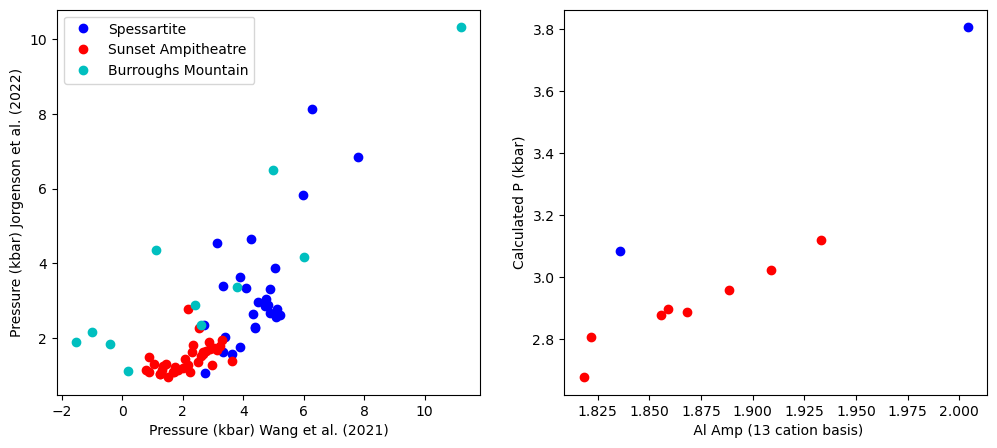

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot(Rainier_Spessartite['P_Wang21_eq1'], Rainier_Spessartite['P_Jorgenson22'], 'ob', label='Spessartite')
ax1.plot(Rainier_sunset['P_Wang21_eq1'], Rainier_sunset['P_Jorgenson22'], 'or', label='Sunset Ampitheatre')
ax1.plot(Rainier_Burr['P_Wang21_eq1'], Rainier_Burr['P_Jorgenson22'], 'oc', label='Burroughs Mountain')
ax1.set_xlabel('Pressure (kbar) Wang et al. (2021)')
ax1.set_ylabel('Pressure (kbar) Jorgenson et al. (2022)')
ax1.legend()

ax2.plot(Rainier_Sunset['Al_Amp_13_cat'], Rainier_Sunset['P_kbar_calc'], 'or' )
ax2.plot(Rainier_Spess['Al_Amp_13_cat'], Rainier_Spess['P_kbar_calc'], 'ob' )
ax2.set_xlabel(' Al Amp (13 cation basis)')
ax2.set_ylabel('Calculated P (kbar)')
fig.savefig('Rainier_Supplement.png', dpi=200)

In [20]:
Rainier_Spess

,P_kbar_calc,Input_Check,Fail Msg,classification,equation,H2O_calc,Fe2O3_calc,FeO_calc,Total_recalc,Sum_input,SiO2_Amp_cat_prop,MgO_Amp_cat_prop,FeOt_Amp_cat_prop,CaO_Amp_cat_prop,Al2O3_Amp_cat_prop,Na2O_Amp_cat_prop,K2O_Amp_cat_prop,MnO_Amp_cat_prop,TiO2_Amp_cat_prop,Cr2O3_Amp_cat_prop,F_Amp_cat_prop,Cl_Amp_cat_prop,Si_Amp_13_cat,Mg_Amp_13_cat,Fet_Amp_13_cat,Ca_Amp_13_cat,Al_Amp_13_cat,Na_Amp_13_cat,K_Amp_13_cat,Mn_Amp_13_cat,Ti_Amp_13_cat,Cr_Amp_13_cat,F_Amp_13_cat,Cl_Amp_13_cat,cation_sum_Si_Mg,Si_T,Al_IV_T,Ti_T,Cr_C,Fe3_C,Mg_C,Fe2_C,Mn_C,Ca_B,Na_B,Na_A,K_A,Al_VI_C,Ti_C,Charge,Fe3_calc,Fe2_calc,"O=F,Cl",Total,Mgno_Fe2,Mgno_FeT,Na_calc,B_Sum,A_Sum,class,APE,P_Ridolfi21,T_Ridolfi12,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp,Latitude,Volcano,Phase,Preferred_P,Class
34,NaN,False,APE >60,Tschermakitic pargasite,(1b+1c)/2,1.521572,9.997498,0.234124,102.512871,100.47,0.743792,0.422539,0.128469,0.197222,0.232834,0.087126,0.014013,0.001551,0.024656,0.0,0.059480,0.000564,6.222834,3.535112,1.074820,1.650029,1.947975,0.728930,0.117242,0.012973,0.206285,0.0,0.497631,0.004720,1.553841,6.222834,1.777166,0.000000,0.0,1.047557,3.535112,0.027263,0.012973,1.650029,0.349971,0.378959,0.117242,0.170809,0.206285,44.952443,1.047557,0.027263,-0.480323,NaN,0.992347,0.766847,0.349971,2.0,0.496201,N/A,66.480171,NaN,NaN,44.69,1.97,11.87,9.23,0.11,17.03,11.06,2.70,0.66,0.0,1.13,0.02,Rainier,46.8523,Rainier,Amp,NaN,Unfilt
35,NaN,False,APE >60,Tschermakitic pargasite,1b,1.201283,13.793428,-2.751503,103.834451,102.06,0.747620,0.450824,0.134454,0.198827,0.216946,0.077768,0.014863,0.001410,0.024531,0.0,0.100537,0.000564,6.167759,3.719232,1.109228,1.640292,1.789771,0.641577,0.122616,0.011630,0.202380,0.0,0.829415,0.004654,1.575785,6.167759,1.789771,0.042470,0.0,1.425175,3.719232,-0.315947,0.011630,1.640292,0.359708,0.281869,0.122616,0.000000,0.159910,44.574825,1.425175,-0.315947,-0.808758,NaN,1.092836,0.770273,0.359708,2.0,0.404485,N/A,60.748179,NaN,NaN,44.92,1.96,11.06,9.66,0.10,18.17,11.15,2.41,0.70,0.0,1.91,0.02,Rainier,46.8523,Rainier,Amp,NaN,Unfilt
36,3.807256,True,,Mg-hastingsite,(1b+1c)/2,1.148284,8.536996,2.868302,101.343997,100.12,0.701684,0.393509,0.146842,0.205603,0.233030,0.087126,0.014226,0.001692,0.034794,0.0,0.096326,0.001128,6.034789,3.384351,1.262904,1.768273,2.004161,0.749324,0.122348,0.014549,0.299247,0.0,0.828445,0.009703,1.511552,6.034789,1.965211,0.000000,0.0,0.919549,3.384351,0.343354,0.014549,1.768273,0.231727,0.517597,0.122348,0.038950,0.299247,45.080451,0.919549,0.343354,-0.779585,NaN,0.907891,0.728247,0.231727,2.0,0.639945,N/A,52.342963,3.807256,1243.166607,42.16,2.78,11.88,10.55,0.12,15.86,11.53,2.70,0.67,0.0,1.83,0.04,Rainier,46.8523,Rainier,Amp,3.807256,Unfilt
37,3.085802,True,,Tschermakitic pargasite,1b,1.902381,8.613312,0.859632,101.831333,99.18,0.752779,0.429982,0.119840,0.204890,0.218515,0.071314,0.016986,0.000987,0.025282,0.0,0.013686,0.000564,6.324303,3.612396,1.006805,1.721332,1.835803,0.599132,0.142704,0.008290,0.212403,0.0,0.114977,0.004739,1.547385,6.324303,1.675697,0.000000,0.0,0.906285,3.612396,0.100521,0.008290,1.721332,0.278668,0.320464,0.142704,0.160106,0.212403,45.093715,0.906285,0.100521,-0.113991,NaN,0.972927,0.782039,0.278668,2.0,0.463169,N/A,33.562306,3.085802,1189.327434,45.23,2.02,11.14,8.61,0.07,17.33,11.49,2.21,0.80,0.0,0.26,0.02,Rainier,46.8523,Rainier,Amp,3.085802,Unfilt
38,NaN,False,Recalc Total>102,Tschermakitic pargasite,1b,1.777980,9.277510,0.611978,102.507156,100.04,0.755276,0.434944,0.124711,0.204355,0.213415,0.076155,0.016561,0.001269,0.025282,0.0,0.029477,0.000564,6.314620,3.636431,1.042670,1.708543,1.784294,0.636706,0.138464,0.010607,0.211377,0.0,0.246446,0.004716,1.554897,6.314620,1.685380,0.000000,0.0,0.971455,3.636431,0.071216,0.010607,1.708543,0.291457,0.345249,0.138464,0.098914,0.211377,45.028545,0.971455,0.071216,-0.240312,NaN,0.980792,0.777164,0.291457,2.0,0.483714,N/A,48.112000,NaN,NaN,45.38,2.02,10.88,8.96,0.09,17.5

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([3.08580176, 3.15794723, 3.2300927 , 3.30223817, 3.37438364,
        3.44652911, 3.51867458, 3.59082005, 3.66296552, 3.73511099,
        3.80725646]),
 <BarContainer object of 10 artists>)

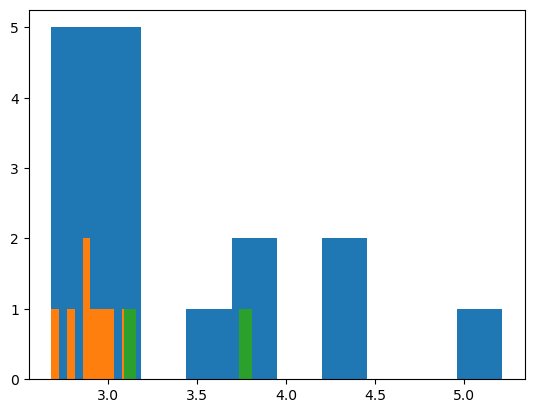

In [21]:
plt.hist(Rainier_Amp['P_Ridolfi21'])
plt.hist(Rainier_Sunset['P_Ridolfi21'])
plt.hist(Rainier_Spess['P_Ridolfi21'])

In [22]:
np.nanmedian(Rainier_Sunset['P_Ridolfi21'])

2.8946795697701897

In [23]:
len(Rainier_Amp)

31

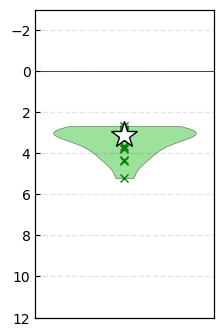

In [24]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2.3,4), sharey=True)
ax2 = ax1.twinx()


ax = sns.violinplot(y=Rainier_Amp['P_Ridolfi21'],
                inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)


ax1.plot(0*Rainier_Amp['P_Ridolfi21'],
  Rainier_Amp['P_Ridolfi21'],
         'x', mec='green')

ax1.plot(0,
  np.nanmedian(Rainier_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Rainier_Amp.png', dpi=200)

In [25]:
sum(Rainier_Amp['P_kbar_calc']>-10)

16

In [26]:
## Load in LP data

In [27]:
LPs=pd.read_excel(r'../Geophysics_April23.xlsx',
                  sheet_name="LPEarthquakes")
LPs_Rainier=LPs.loc[LPs['Volcano']=="Mount Rainier"]
LPs_Rainier.head()

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
62,Mount Rainier,46.8523,19.702027,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
63,Mount Rainier,46.8523,16.491283,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
64,Mount Rainier,46.8523,10.328917,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
65,Mount Rainier,46.8523,12.135226,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
66,Mount Rainier,46.8523,13.928294,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN


In [28]:
len(LPs_Rainier)

18

## Raw template for geophysics and Exp Pet

## Expet plot

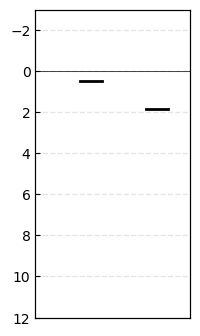

In [29]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
# less than 0.5 kbar, from Venezky and Rutherford (1997)
ax1.plot([0.2, 0.3],[0.5, 0.5], '-k',  lw=2)
ax2.plot([0.5, 0.6],[7, 7], '-k',  lw=2)


ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([0, 0.7])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])                 
fig.savefig('Expet_Rainier.png', dpi=200, bbox_inches="tight")

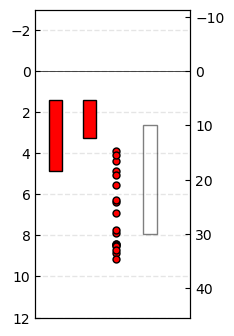

In [30]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
elev=4.3925 # Elevation of Rainier in Km
mean_elev=elev-1.300 # Mean station elevation

sep=0.5
### SEISMIC CONSTRAINTS
# Moran et al. 199 - P wave.
rect_M1999 = patches.Rectangle((0.5,1+elev),0.2, 14-1,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_M1999)

# Flinders and Shen, 2017.
rect_FS2017 = patches.Rectangle((0.5+sep,1+elev),0.2, 8-1,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_FS2017)


ax2.plot(1.5+0*LPs_Rainier['Depth'], LPs_Rainier['Depth']+elev, 'ok', mfc='red', ms=5)

rect_Reg = patches.Rectangle((1.9,10),0.2,30-10,linewidth=1,
                             edgecolor='k',facecolor='None', alpha=0.5)
ax2.add_patch(rect_Reg)

ax1.plot([-1, 8], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([0.3, 2.6])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophysical+Other_Rainier.png', dpi=200, bbox_inches="tight")